Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2796 - accuracy: 0.9160 - val_loss: 0.1442 - val_accuracy: 0.9560
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1172 - accuracy: 0.9641 - val_loss: 0.1037 - val_accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0814 - accuracy: 0.9750 - val_loss: 0.1133 - val_accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.0782 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0847 - val_accuracy: 0.9753


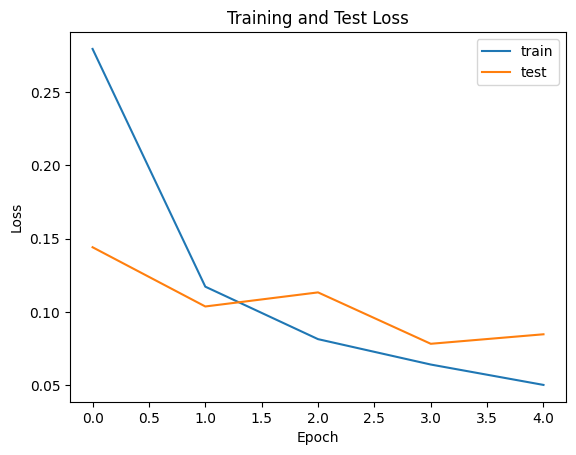

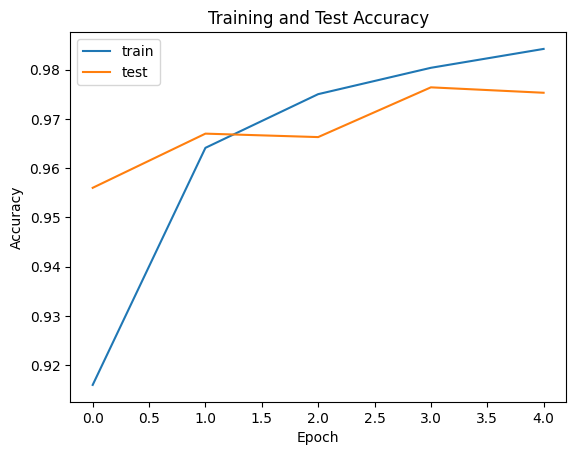

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Define the architecture of the BPNN
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with the loss function, optimizer, and metric
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model on the MNIST training set, and evaluate it on the test set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Plot the training loss and accuracy
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
